In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


# *Downloading Dataset to GoogleColab*

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


# *Unzip a file*

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# *Import libraries*

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# *VGG16 Model*

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [7]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# *Training The Model*

In [9]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# *Augmentation*

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# *Compiling the Model*

In [22]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

# *Training the model*

In [23]:
history = model.fit(train_generator,epochs=12,validation_data=validation_generator)

Epoch 1/12
625/625 [==============================] - 157s 249ms/step - loss: 1.6044 - accuracy: 0.8458 - val_loss: 0.1401 - val_accuracy: 0.9446
Epoch 2/12
625/625 [==============================] - 154s 247ms/step - loss: 0.2139 - accuracy: 0.9245 - val_loss: 0.1334 - val_accuracy: 0.9504
Epoch 3/12
625/625 [==============================] - 154s 246ms/step - loss: 0.1822 - accuracy: 0.9344 - val_loss: 0.1341 - val_accuracy: 0.9466
Epoch 4/12
625/625 [==============================] - 155s 248ms/step - loss: 0.1500 - accuracy: 0.9487 - val_loss: 0.1148 - val_accuracy: 0.9580
Epoch 5/12
625/625 [==============================] - 155s 249ms/step - loss: 0.1396 - accuracy: 0.9533 - val_loss: 0.1369 - val_accuracy: 0.9502
Epoch 6/12
625/625 [==============================] - 155s 248ms/step - loss: 0.1429 - accuracy: 0.9534 - val_loss: 0.1748 - val_accuracy: 0.9240
Epoch 7/12
625/625 [==============================] - 155s 248ms/step - loss: 0.1316 - accuracy: 0.9580 - val_loss: 0.2207 -

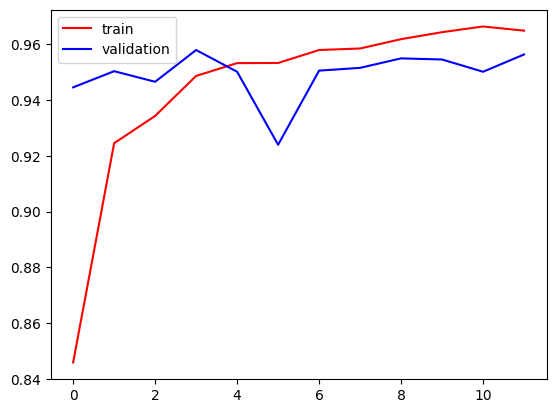

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

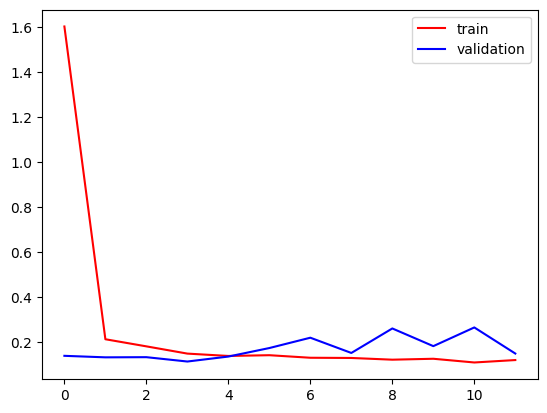

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 145ms/step


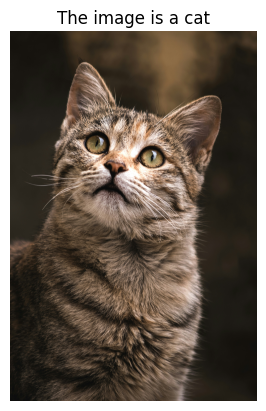

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = '/content/sajad-nori-s1puI2BWQzQ-unsplash.jpg'

img_array = load_and_preprocess_image(img_path)

prediction = model.predict(img_array)

img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')

if prediction[0] > 0.5:
    plt.title('The image is a dog')
else:
    plt.title('The image is a cat')

plt.show()


1/1 [==============================] - 0s 26ms/step


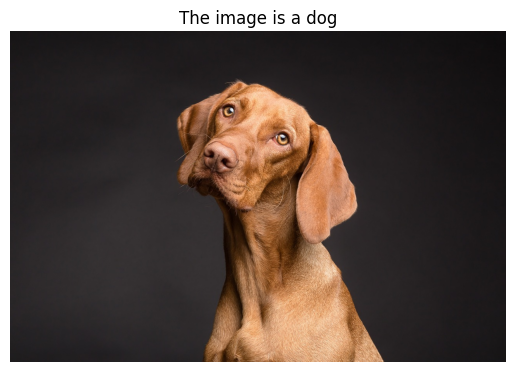

In [27]:
img_path = '/content/dog-3277416_1280.jpg'

img_array = load_and_preprocess_image(img_path)

prediction = model.predict(img_array)

img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')

if prediction[0] > 0.5:
    plt.title('The image is a dog')
else:
    plt.title('The image is a cat')

plt.show()
